# Set Up

In [52]:
import pandas as pd
import numpy as np
from langdetect import detect
import matplotlib.pyplot as plt

In [2]:
import spotiscience as sps

# Credentials

In [3]:
U2FsdGVkX1/KTh90tBvTvZIJdBzcnGVNAubbAFvlazQeTShbHkcNyab0KTRKlpmDh5oCMto/phIv+TlB
SkakdYwTOBZiNPLBO4h/cimgkXr1IvcNIg+j++M0pn0BD7abvs3ov/u6YqGJuiN/DU0Kguc5uw1ufceh
t9xgZeWDXB627ndTIhs0+gz6NZBxc8yfzaNxu5wpJA1oYy59sgyavsSLZjGDzo5v6ga4tFLffHAtRBMq
IQrUyIZlJ1ZPP4lWinqH721yZrckspEJMQR99TO9Iz/qdrgRKVFYzjxNj5DwXZHoiVm4aiZ20kzxb0NS
fYmFeoD7F+hKnVd19HCQR6FduT4y0L9yUWdIv5SxshN5MxbC4oHYfOM6m+MROs9Y

# Downloader

## Set Up

In [4]:
#create a dictionary with authorization keys
CREDENTIALS = {}
CREDENTIALS['client_id'] = client_id
CREDENTIALS['client_secret'] = client_secret
CREDENTIALS['redirect_url'] = redirect_url
CREDENTIALS['user_id'] = userid
CREDENTIALS['genius_access_token'] = genius_access_token # genius is optional, only

"""You also can set your credentials id on credentials.py and import from spotiscience"""

# returns 'downloader class'
sd = sps.downloader.SpotiScienceDownloader(credentials=CREDENTIALS)


## Playlist download

In [5]:
#Return song features of playlist
playlist = 'https://open.spotify.com/playlist/1UseUQhEDVhhHwfXxiVzP2?si=11a972b658a449c1'
len_playlist=50
playlist_data = sd.get_playlist_song_features(playlist_id=playlist,n_songs=len_playlist)

Playlist fusion downloaded!


In [6]:
song = playlist_data['fusion'][0]

## Artist info

In [7]:
# On peut obtenir des informations des artistes directement
# problème : demande à chaque fois l'autorisation so meh for automatisation
artist = 'metallica'
sd.get_artist_information(artist=artist)

{'artists': {'href': 'https://api.spotify.com/v1/search?query=metallica&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2ye2Wgw4gimLv2eAKyk1NB'},
    'followers': {'href': None, 'total': 22801708},
    'genres': ['hard rock',
     'metal',
     'old school thrash',
     'rock',
     'thrash metal'],
    'href': 'https://api.spotify.com/v1/artists/2ye2Wgw4gimLv2eAKyk1NB',
    'id': '2ye2Wgw4gimLv2eAKyk1NB',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5eb8101d13bdd630b0889acd2fd',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab676161000051748101d13bdd630b0889acd2fd',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f1788101d13bdd630b0889acd2fd',
      'width': 160}],
    'name': 'Metallica',
    'popularity': 81,
    'type': 'artist',
    'uri': 'spotify:artist:2ye2Wgw4gimLv2eAKyk1NB'}],
  'limit': 1,
  'next': 'http

# Prediction : mood and topics, examples on one song

In [8]:
# returns 'predicter class'
sp = sps.SpotiSciencePredicter()

## Mood

In [9]:
#returns the tag of mood 
mood = sp.predict_song_mood(song=song)
song['mood'] = mood

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 1.1.3. This might lead 

## Get Song Genre

In [10]:
genre = sd.get_song_music_genre(song_id=song['id'])
song['genre'] = genre

## Lyrics topics prediction

### Get Lyrics

In [ ]:
lyrics = sd.get_song_lyrics(songname=song['name'],artistname=song['artist'])

The topic prediction of song lyrics uses any of the algorithms Latent Dirichlet Allocation Model (LDA), Non Negative Matrix Factorization Model (NMF) or Latent Semantic Indexing Model (LSI). To do this, I based my code on the following article which you can read here.

To predict the topic of lyrics you must configure the following parameters:

lyric = the lyric of the song

model = the model to use [options are “lsi”,”lda” or “nmf”]

lang = language of the song lyric [options are “english” or “spanish”]

n_grams = number of subsence of words to group

n_topics = number of returned topics

top_n = number of words per returned topic

For more information about the parameter n_grams, you can read the official documentation about vectorization with sklearn by clicking here

## Recognize language and topics

There is a necessity to add errors handling for topics : not every song has lyrics avaible, nor every lyrics is in french, english, spanish or german.

In [ ]:
langues = {
    'en' : 'english',
    'fr' : 'french',
    'es': 'spanish',
    'de': 'german'
}

In [ ]:
lyrics = sd.get_song_lyrics(songname=song['name'],artistname=song['artist'])
model = 'lda' # (available type 'lda', 'lsi', 'nmf')
lang = languages[detect(lyrics)] # (available type 'english','spanish', 'french', 'german')
# check for the last one.
# using langdetect detect function to identify the language
# need to had a error gestion regarding the language, if the lyrics can't be identify in those
# or install the core relevant to the language
n_grams = (1,1)
n_topics = 1
top_n = 5
topics = sp.predict_topic_lyric(lyrics,model,lang,n_grams,n_topics,top_n)
song['topics'] = topics

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


defaultdict(list,
            {'Topic 0:': [[('bone', 4.41991888513177),
               ('body', 2.8039771919426677),
               ('break', 2.7698478850430925),
               ('come', 1.9894166880141686),
               ('try', 1.9565224470565998),
               ('mountain', 1.2065403807567638),
               ('needle', 1.1967279844347747),
               ('meaning', 1.193678541518933),
               ('eye', 1.181337183969211),
               ('blue', 1.171405527554313)]],
             'Topic 1:': [[('alive', 1.187790728353454),
               ('suddenly', 1.1861348640317808),
               ('bury', 1.1795919867150366),
               ('good', 1.1766258966207472),
               ('silence', 1.174942167618257),
               ('reality', 1.1663703932788427),
               ('hit', 1.1532319537295035),
               ('change', 0.4616988114555919),
               ('likeembed', 0.4261922618870541),
               ('foot', 0.4104149238122401)]],
             'Topic 2:': [[('ooh', 2

# Example on a whole playlist

In [59]:
sp = sps.SpotiSciencePredicter()

In [60]:
languages = {
    'en' : 'english',
    'fr' : 'french',
    'es': 'spanish',
    'de': 'german'
}
name = 'fusion' # name of the playlist u want to extract the predictions from
len_playlist = 150

In [61]:
#Return song features of playlist
playlist = 'https://open.spotify.com/playlist/1UseUQhEDVhhHwfXxiVzP2?si=11a972b658a449c1'
playlist_data = sd.get_playlist_song_features(playlist_id=playlist,n_songs=100)

Playlist fusion downloaded!


In [62]:
for song in playlist_data[name]:

    mood = sp.predict_song_mood(song=song)
    song['mood'] = str(mood)

    genre = sd.get_song_music_genre(song_id=song['id'])
    song['genre'] = genre
    

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 1.1.3. This might lead 

In [101]:
df_playlist = pd.DataFrame.from_records(playlist_data[name])

In [102]:
collected_genre = df_playlist['genre'].sum()

<AxesSubplot: >

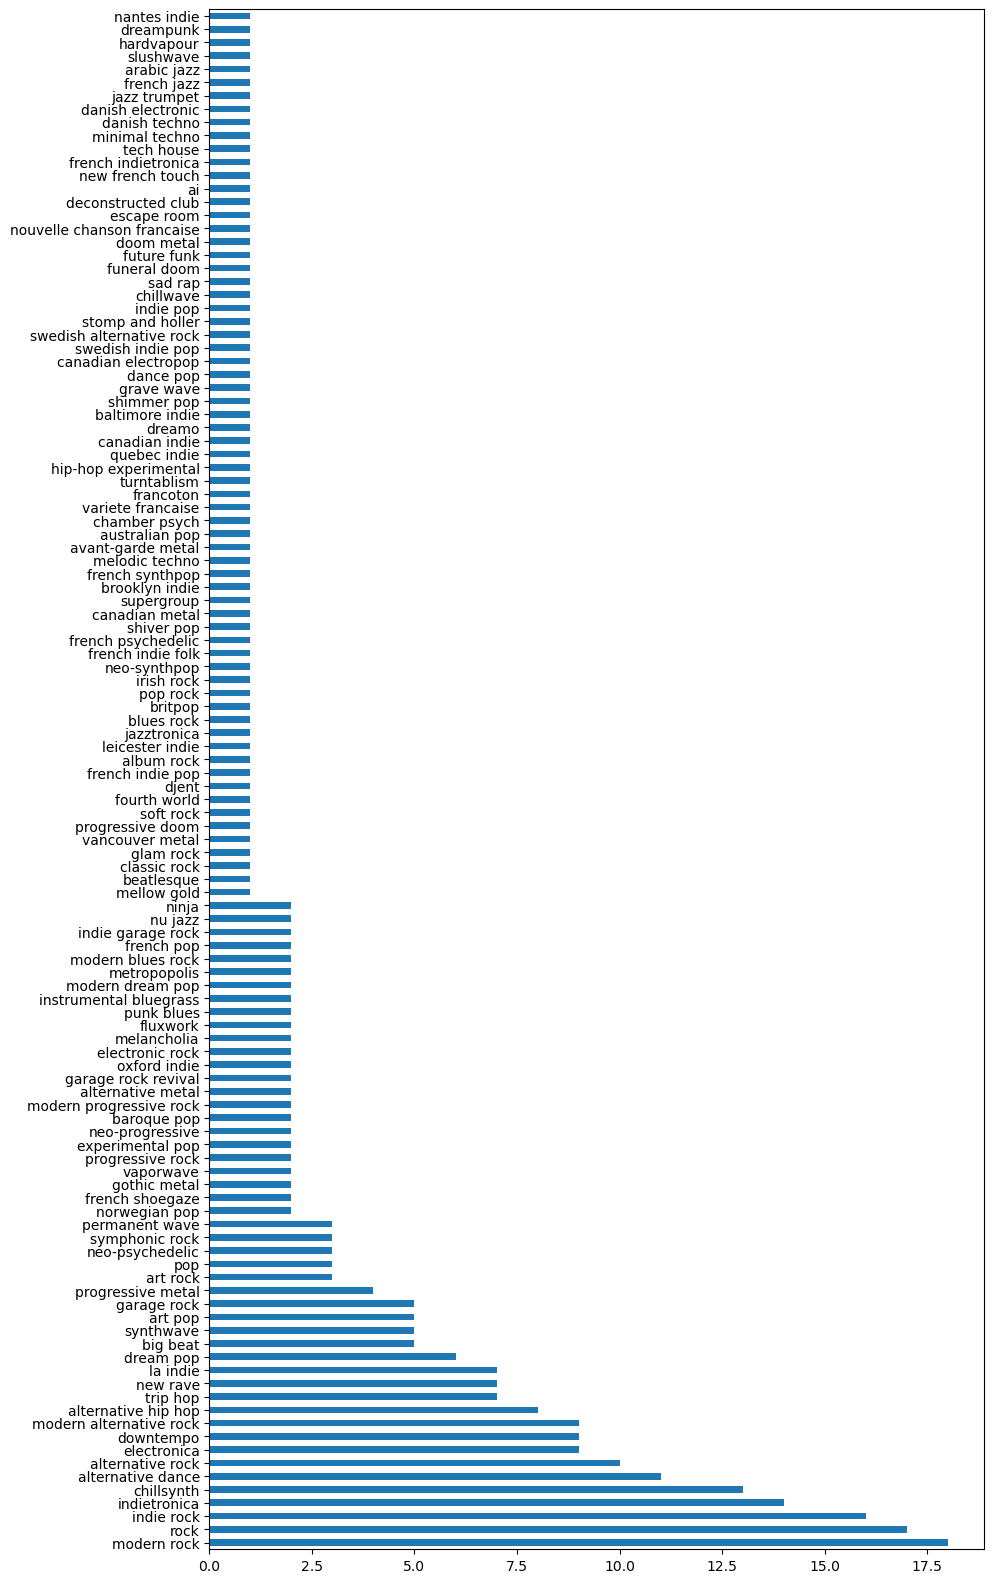

In [103]:
fig = plt.figure()
fig.set_size_inches(10,20)
pd.Series(collected_genre).value_counts().plot.barh()

On retient en genre les suivants :
- jazz ou funk
- pop
- electro ou techno ou club ou tronica
- synth
- rock
- prog ou exp
- alt
- dance, rave


In [89]:
selfdefined_genre = ['jazz,funk','pop','electro,techno,club,tronica','synth,dream,dance','rock','prog,exp','alt,modern','dance,rave']
for genre in selfdefined_genre:
    df_playlist[genre] = ''

In [124]:
# identification of the song 49 (50th) to the chosen genres
song = df_playlist.iloc[49]
print(song['genre'])
for genre in selfdefined_genre:
    subgenre = genre.split(',')
    b = False
    for sub in subgenre:
        for song_genre in song['genre']:
            b = b or (sub in song_genre) #we test if in the str of the genre of the song we find an occurence of our subgenre
    print(genre, b)

['arabic jazz', 'french jazz', 'jazz trumpet']
jazz,funk True
pop False
electro,techno,club,tronica False
synth,dream,dance False
rock False
prog,exp False
alt,modern False
dance,rave False


In [158]:
# identification for every song
for genre in selfdefined_genre:
    rows_in_genre = []
    for song_genre in df_playlist['genre']:
        subgenre = genre.split(',')
        b = False
        for sub in subgenre:
            for song_subgenre in song_genre:
                b = b or (sub in song_subgenre) #we test if in the str of the genre of the song we find an occurence of our subgenre
        rows_in_genre.append(b)
    df_playlist[genre] = rows_in_genre


In [163]:
df_playlist.sample(3)

,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,mood,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream,dance",rock,"prog,exp","alt,modern","dance,rave"
55,5pbRVTnZnycQjtooJkuZZz,S4,Breton,War Room Stories,2014-01-29,11,325760,0.0876,0.630,0.533,...,sad,[electronic rock],False,False,True,False,True,False,False,False
15,6a5GKKW5x6w8W5QPkrcl4l,The Bunting Song,"The Good, the Bad & the Queen","The Good, The Bad and The Queen",2007-01-22,24,227347,0.0388,0.444,0.652,...,sad,[modern alternative rock],False,False,False,False,True,False,True,False
26,2RAXAF7qjvn0FsRuMMTlBx,Love Is to Die,Warpaint,Warpaint,2014-01-20,49,291758,0.2530,0.331,0.639,...,sad,"[alternative dance, art pop, chamber psych, ch...",False,True,True,True,True,False,True,True
